## Breast Cancer Multi-Linear Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import sklearn
from numpy.random import default_rng
import matplotlib.pyplot as plt

In [2]:
# Import the dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

#Turning to dataframe to visualise
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['target'] = data['target']

df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [3]:
df['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

In [4]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


## Everything from scratch

In [5]:
x = data['data']
y = data['target']
x.shape, y.shape

def split_dataset(x, y, test_set_proportion, random_generator = default_rng()):
    # Randomly split up the data into training and test sets
    rng = random_generator
    dataset_len = len(x)
    
    n_test = int(test_set_proportion*dataset_len)
    n_train = dataset_len - n_test
    
    indices = rng.permutation(dataset_len)

    x_train = x[indices[:n_train]]
    x_test = x[indices[n_train:]]

    y_train = y[indices[:n_train]]
    y_test = y[indices[n_train:]]

    # Check that the indices are in fact collecting all the data 
    print(len(set(np.concatenate((indices[:n_train],indices[n_train:])))))

    # Perform standardisation
    x_train_mean, x_train_std = np.mean(x_train), np.std(x_train)
    x_test_mean, x_test_std = np.mean(x_test), np.std(x_test)

    x_train = (x_train - x_train_mean)/x_train_std
    x_test = (x_test - x_test_mean)/x_test_std
    
    # Include 1 for bias term 
    x_train = np.c_[x_train, np.ones(456)]
    x_test = np.c_[x_test, np.ones(113)]
          
    return x_train, y_train, x_test, y_test


x_train, y_train, x_test, y_test = split_dataset(x, y, 0.2)
x_test[0]

569


array([-0.21605887, -0.18486966,  0.03610917,  1.3791943 , -0.26285458,
       -0.26300824, -0.26311645, -0.26312582, -0.26238106, -0.26296896,
       -0.26211437, -0.25502878, -0.25511173, -0.19067616, -0.26318883,
       -0.26315809, -0.26315888, -0.26317479, -0.26307427, -0.2632038 ,
       -0.21195284, -0.15480028,  0.06563938,  1.64173109, -0.26275226,
       -0.26281331, -0.26290368, -0.26295868, -0.26186096, -0.26292587,
        1.        ])

In [40]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def accuracyfunc(y_pred, y_true):
    correct = np.sum(y_pred == y_true)
    return correct/len(y_pred)


print(sigmoid(-5))

# Create Logistic Regression Class
class Logisticregressor:
    def __init__(self, x, y, random_generator):
        rng = random_generator
        self.w  = rng.random((31))
        self.w[-1] = 0
        
    
    def forward(self, x):
        yhat = np.matmul(x, self.w)
        log_yhat = sigmoid(yhat)

        return log_yhat

    def loss(self, x, y):
        yhat = model.forward(x)
        loss = y*np.log(yhat) + (1-y)*np.log(1-yhat)
        
        return -loss/len(y)
    
    def gradient(self, x, y):
        yhat = model.forward(x)
        diff = yhat - y 
        # print(x.shape, diff.shape)
        
        gradient = np.matmul(diff, x)
        
        return gradient
        
    def gradient_descent(self, x, y):
        grad = model.gradient(x, y)
        self.w = self.w - lr * grad
        
model = Logisticregressor(x_train, y_train, np.random.default_rng())

# print(model.forward(x_train))
print(model.loss(x_train, y_train).shape)

0.0066928509242848554
(456,)


In [165]:
# Training and Test Run 
model = Logisticregressor(x, y, np.random.default_rng(seed=42))
epochs = 2000
lr = 0.0001
train_loss = np.zeros(epochs)
train_accuracy_array = np.zeros(epochs)

test_loss = np.zeros(epochs)
test_accuracy_array = np.zeros(epochs)

for epoch in range (epochs):
    error = np.sum(model.loss(x_train, y_train))
    train_loss[epoch] = error
    predictions = np.round(model.forward(x_train))
    # print(predictions)

    accuracy = accuracyfunc(predictions, y_train)
    train_accuracy_array[epoch] = accuracy
    
    model.gradient_descent(x_train, y_train)
    if epoch > 100: 
        if epoch % 400 == 0:   
            print(f"Epoch: {epoch} | Train Loss: {error} | Train Accuracy: {accuracy}")
    elif epoch % 10 == 0:
        print(f"Epoch: {epoch} | Train Loss: {error} | Train Accuracy: {accuracy}")

model = Logisticregressor(x, y, np.random.default_rng(seed=42))

for epoch in range(epochs):
    error = np.sum(model.loss(x_test, y_test))
    test_loss[epoch] = error
    predictions = np.round(model.forward(x_test))

    accuracy = accuracyfunc(predictions, y_test)
    test_accuracy_array[epoch] = accuracy

    model.gradient_descent(x_test, y_test)
    if epoch > 200:
        if epoch % 400 == 0:
            print(f"Epoch: {epoch} | Test Loss: {error} | Test Accuracy: {accuracy}")
    elif epoch % 10 == 0:
        print(f"Epoch: {epoch} | Test Loss: {error} | Test Accuracy: {accuracy}")
    

Epoch: 0 | Train Loss: 2.6126456780741565 | Train Accuracy: 0.30701754385964913
Epoch: 10 | Train Loss: 1.7989869180030886 | Train Accuracy: 0.10526315789473684
Epoch: 20 | Train Loss: 1.5760891820632328 | Train Accuracy: 0.16885964912280702
Epoch: 30 | Train Loss: 1.4101579451420663 | Train Accuracy: 0.18640350877192982
Epoch: 40 | Train Loss: 1.2603989345773114 | Train Accuracy: 0.19736842105263158
Epoch: 50 | Train Loss: 1.127113332385892 | Train Accuracy: 0.21271929824561403
Epoch: 60 | Train Loss: 1.0106367080692258 | Train Accuracy: 0.2412280701754386
Epoch: 70 | Train Loss: 0.910495012945316 | Train Accuracy: 0.26535087719298245
Epoch: 80 | Train Loss: 0.8254627709873501 | Train Accuracy: 0.3092105263157895
Epoch: 90 | Train Loss: 0.7537993829977139 | Train Accuracy: 0.33771929824561403
Epoch: 100 | Train Loss: 0.6935568374703103 | Train Accuracy: 0.34868421052631576
Epoch: 400 | Train Loss: 0.2846520620583012 | Train Accuracy: 0.9254385964912281
Epoch: 800 | Train Loss: 0.22124

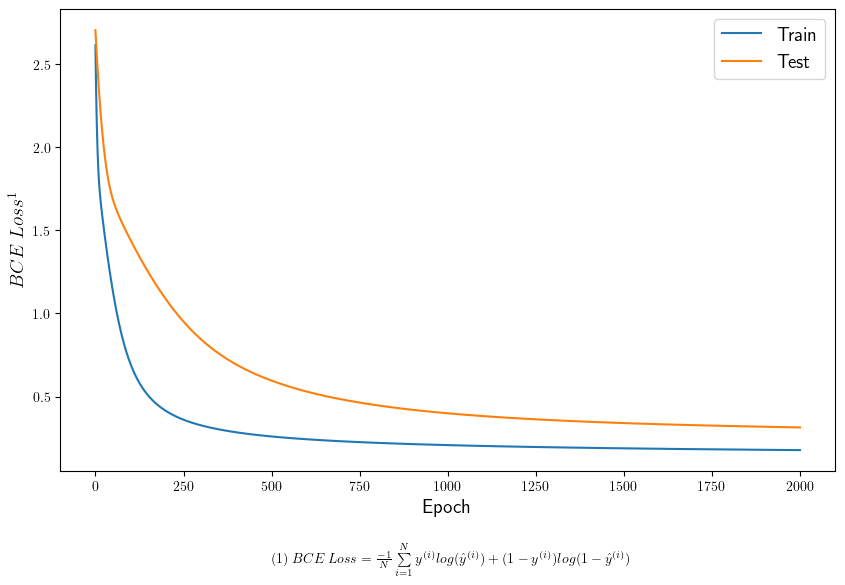

<Figure size 7680x5760 with 0 Axes>

In [166]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
plt.rcParams['text.usetex'] = True
plt.figure(dpi=1200)

ax.plot(np.arange(0,epochs), train_loss, label='Train');
ax.plot(np.arange(0,epochs), test_loss, label = 'Test');

ax.set_xlabel("Epoch", size=14)
ax.set_ylabel(r'$BCE \: Loss^{1} $', size=14)
ax.legend(fontsize=14)

ax.text(0.25*epochs, -0.5, r'$(1) \: BCE \: Loss = \frac{-1}{N}  \sum\limits_{i=1}^N     y^{(i)}log(\hat{y}^{(i)}) + (1-y^{(i)})log(1-\hat{y}^{(i)})  $ ');

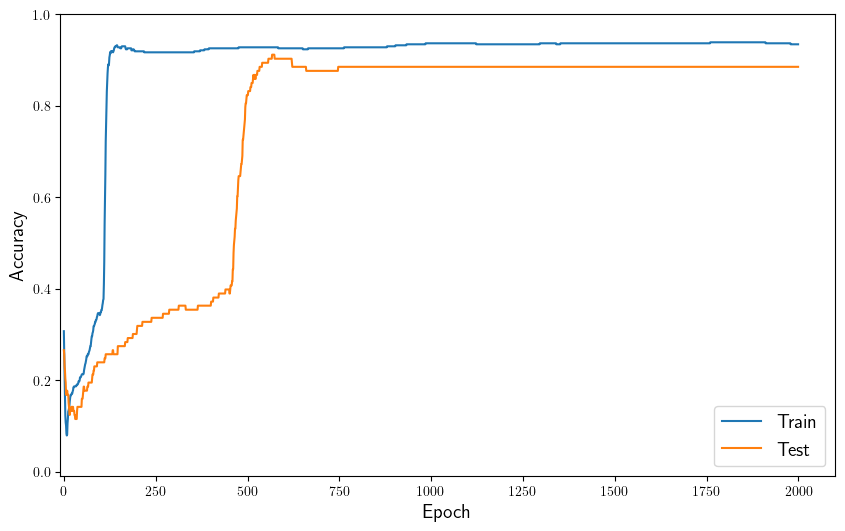

In [167]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

ax.plot(np.arange(0,epochs), train_accuracy_array, label='Train');
ax.plot(np.arange(0,epochs), test_accuracy_array, label='Test');

ax.set_xlabel("Epoch", size=14)
ax.set_ylabel('Accuracy', size=14)
ax.legend(fontsize=14)

ax.set_ylim(-0.01,1);
ax.set_xlim(-10,epochs+0.05*epochs);